In [1]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
%matplotlib inline

In [3]:
def coin_flip():
    coin = random.randint(0,1)
    if coin == 1:
        return True
    return False

def get_ratio(list_tup):
    return [x/(x+y) for x,y in list_tup]

def get_total(list_tup):
    return [x+y for x,y in list_tup]

In [4]:
def n_flips(n=2**16):
    head_flips = 0
    tail_flips = 0
    checkpoint = []
    for flip in range(n):
        if coin_flip():
            head_flips += 1
        else:
            tail_flips += 1
        if math.log2(flip+1) % 1 == 0:
            checkpoint.append((head_flips, tail_flips))
    if sum(checkpoint[len(checkpoint)-1]) != head_flips + tail_flips:
        checkpoint.append((head_flips,tail_flips))
    
    return checkpoint
flip_data = n_flips()

In [5]:
total = get_total(flip_data)

In [6]:
x_axis = ['2**{}'.format(x) for x in range(17)]
ratio_axis = [x/10 for x in range(11)]
ratio_axis_label = ['{}%'.format(x*10) for x in range(11)]

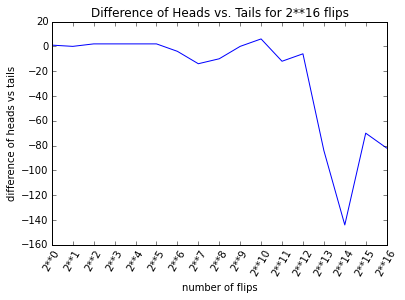

In [7]:
plt.plot([x-y for x,y in flip_data])
plt.xticks(range(17), x_axis, rotation=60)
plt.xlabel('number of flips')
plt.ylabel('difference of heads vs tails')
plt.title('Difference of Heads vs. Tails for 2**16 flips')
plt.show()

# Line Plot of Difference in Heads vs. Tails for 2<sup>16</sup> Flips

## Observations
    1. Despite despite expecting a return to near 0 (we flipped the coin 65536 times) we never get back to an equal number of heads and tails flips.
    2. Having said that, for such a large number of flips the fact it stayed within 200 of 0 suggests that the randomness is working, we have equal chances of heads and tails.

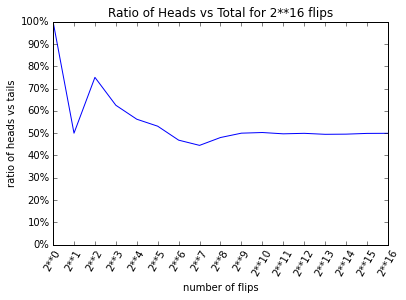

In [8]:
plt.plot(get_ratio(flip_data))
plt.xticks(range(17), x_axis, rotation=60)
plt.xlabel('number of flips')
plt.yticks(ratio_axis, ratio_axis_label)
plt.ylabel('ratio of heads vs tails')
plt.title('Ratio of Heads vs Total for 2**16 flips')
plt.show()

# Line Plot of Ratio of Heads vs Total flips for 2<sub>16</sub> flips.

## Observations
    1. We can expect the first point to be either 0% or 100% since we only have a single flip at that point.  In this case the first flip is heads so it starts at 100%  From there the line gradually evens out as we increase in flips.
    2. As the data grows the line evens out because there are so many results it is difficult to budge it in either direction.
    3. The scale is important to keep in mind.  Since we haven't changed the scale yet it looks linear but is actually increasing quadratically.  This means that one tick on the left can represent 1 or 2 flips whereas those on the right can represent 10,000 plus flips.

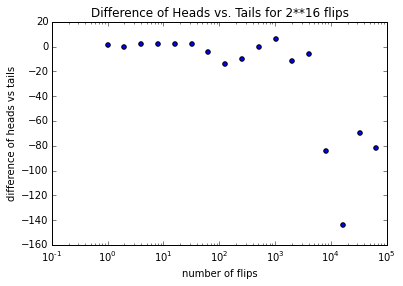

In [9]:
plt.scatter(total,[x-y for x,y in flip_data])
plt.xscale('log')
plt.xlabel('number of flips')
plt.ylabel('difference of heads vs tails')
plt.title('Difference of Heads vs. Tails for 2**16 flips')
plt.show()


# Scatter Plot of Difference of Heads vs Tails for 2<sup>16</sup> Flips
## Observations
    1. He we change from linear represention on the x-axis to logrithmic.  This will persist for the rest of the data so I won't mention it again. 
    2. We expect this data to be a match for the same line chart two above and it is.  

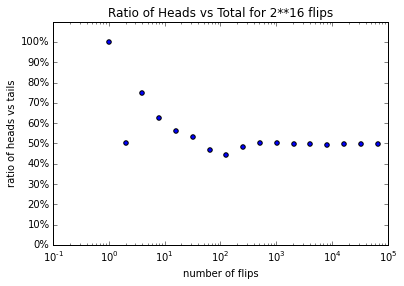

In [10]:
plt.scatter(total,[x/(x+y) for x,y in flip_data])
plt.xscale('log')
plt.yticks(ratio_axis, ratio_axis_label)
plt.xlabel('number of flips')
plt.ylabel('ratio of heads vs tails')
plt.title('Ratio of Heads vs Total for 2**16 flips')
plt.show()

# Scatter plot of Ratio of Heads vs Total flips for 2<sub>16</sub> flips.
## Observations
    1. As with the above this is a match of the line plot previously shown.

In [11]:
def n_flips_20():
    return [n_flips() for x in range(20)]

In [12]:
twenty = n_flips_20()

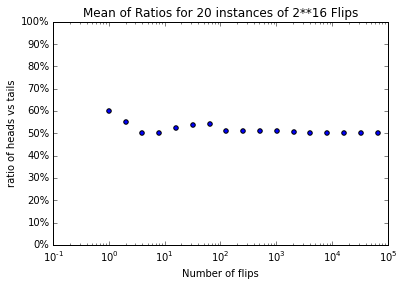

In [28]:
twenty_ratio = [get_ratio(n) for n in twenty]
unpacked_twenty = [statistics.mean(x) for x in list(zip(*twenty_ratio))]
plt.scatter(total,unpacked_twenty)
plt.xscale('log')
plt.xlabel('Number of flips')
plt.ylabel('Mean of Ratios for 20 Runs')
plt.title('Mean of Ratios for 20 instances of 2**16 Flips')
plt.yticks(ratio_axis, ratio_axis_label)
plt.ylabel('ratio of heads vs tails')
plt.show()

# Mean of Ratios for 20 Runs of 2<sup>16</sup> Flips
## Observations
    1. Here since we are averaging 20 attempts we expect to see a much flatter line around 50%, and we do!
    2. We also manage to eliminate the fact we had to start at 100% or 0% and remove a lot of the noise for the lower number of flips.
   

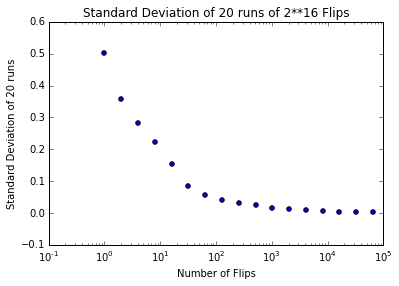

In [30]:
sd_twenty = [statistics.stdev(x) for x in list(zip(*twenty_ratio))]
plt.scatter(get_total(flip_data),sd_twenty)
plt.xscale('log')
plt.xlabel('Number of Flips')
plt.ylabel('Standard Deviation of 20 runs')
plt.title('Standard Deviation of 20 runs of 2**16 Flips')

# Standard Deviation of 20 Runs of 2<sup>16</sup> Flips
## Observations
    1. We can expect the standard deviation to fall as we perform more flips since randomness can be expected to even out at high values and we see this trend perfectly here.
    2. I was honestly surprised by how clean this chart looked, I wondered if I had called the wrong function but the results make sense.

In [15]:
def flip_100k_100():
    return [n_flips(100) for x in range(100000)]

In [16]:
hkh_data = flip_100k_100()

In [17]:
ret = [x[len(x)-1] for x in hkh_data]
ratio_hkh_data = get_ratio(ret)

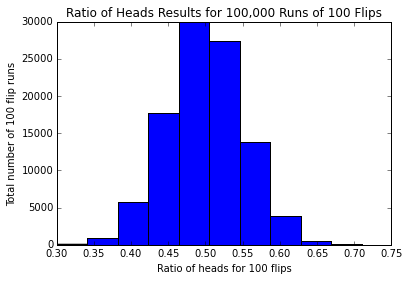

In [34]:
plt.hist(ratio_hkh_data)
plt.xlabel('Ratio of heads for 100 flips')
plt.ylabel('Total number of 100 flip runs')
plt.title('Ratio of Heads Results for 100,000 Runs of 100 Flips')
plt.show()


# Ratio of Heads Results for 100,000 Runs of 100 Flips
## Observations
    1. While we were expecting more randomness with only 100 flips I didn't really expect to see a bell curve here, yet here we are.
    2. I'm unsure why my data seems to favor tails, I suspect it has to do with the angle we are looking at the chart since 50% isn't right in the middle.
    3. While apparently not occuring with our data set it's possible for the data to hit 0 or 100, although very unlikely.

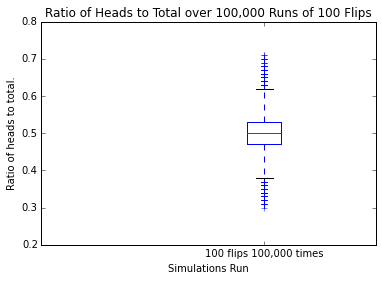

In [64]:
plt.boxplot(ratio_hkh_data)
plt.xlabel('Simulations Run')
plt.xticks(range(2),['','100 flips 100,000 times'])
plt.ylabel('Ratio of heads to total.')
plt.title('Ratio of Heads to Total over 100,000 Runs of 100 Flips')
plt.show()

## Box Plot of Ratio of Heads to Total over 100,00 Runs of 100 Flips
### Observations
    1. As a different visualization of the above data this shows the mean almost perfectly on .5 and the 75th and 25th percentile both well within .05 of the mean.
    2. The wiskers and outliers are a little distracting but they better illustrate that some of our data gets pretty far from the mean whereas it's very hard to see on the histogram.

In [20]:
def flip_100k_1000():
    return [n_flips(1000) for x in range(100000)]

In [21]:
hkt_data = flip_100k_1000()

In [22]:
ret = [x[len(x)-1] for x in hkt_data]
ratio_hkt_data = get_ratio(ret)

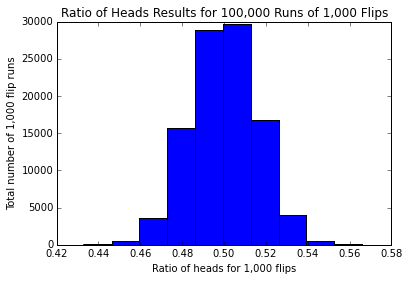

In [65]:
plt.hist(ratio_hkt_data)
plt.xlabel('Ratio of heads for 1,000 flips')
plt.ylabel('Total number of 1,000 flip runs')
plt.title('Ratio of Heads Results for 100,000 Runs of 1,000 Flips')
plt.show()

# Ratio of Heads Results for 100,000 Runs of 1,000 Flips
## observations
    1. The most interesting data here is how by increasing the flips from 100 to 1,000 we can see our standard deviations come in drastically.
    2. Adding to that we see that this chart lines up much more nicely with .50 centered.
   

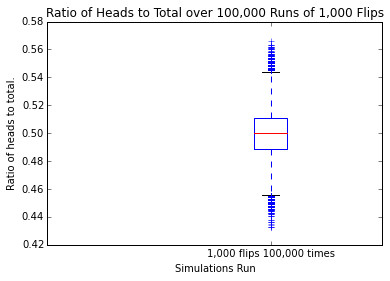

In [66]:
plt.boxplot(ratio_hkt_data)
plt.xlabel('Simulations Run')
plt.xticks(range(2),['','1,000 flips 100,000 times'])
plt.ylabel('Ratio of heads to total.')
plt.title('Ratio of Heads to Total over 100,000 Runs of 1,000 Flips')
plt.show()

## Box Plot of Ratio of Heads to Total over 100,000 Runs of 1,000 Flips
### Observations
    1. Here we see that our percentiles have come in enough to require a different y-scale, splitting every .02 instead of every .1
    2. Also, even our most distant outliers are now within .1 of the mean due to increased convergence over higher numbers of flips.

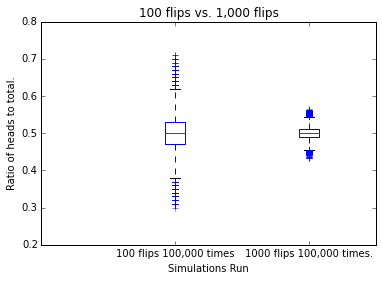

In [68]:
plt.boxplot([ratio_hkh_data,ratio_hkt_data])
plt.xlabel('Simulations Run')
plt.xticks(range(3),['','100 flips 100,000 times', '1000 flips 100,000 times.'])
plt.ylabel('Ratio of heads to total.')
plt.title('100 flips vs. 1,000 flips')
plt.show()

# Box Plots of 100 flip trials vs. 1,000 flip trials.
## Observations
    1. This graph pretty cleanly illustrates what can only be noticed by catching the unit switch in the last graph, when we flip 1,000 times all our data converges hard on the median
    2. I wonder if we increased the flip count even higher (which I dare not do for fear of setting my laptop on fire) we could get the percentiles from the 100 flip trial outside of the whiskers of the higher flip trial.